In [7]:
def sum(m, n): 
        s = 0 
        for i in range(m, n+1):
            s += i
        return s


y = sum(1, 10)
print ("sum of integers from 1 to 10 is", y)
print (sum(0, 10))
# print(sum())
# print(sum(1))

sum of integers from 1 to 10 is 55
55


In [6]:
def print_my_args_A(m, n=10):
    print ("invoked with m=",m," and n=",n)
    return

print_my_args_A(10)

# SEND TWO NUMBERS
print_my_args_A(2, 3)

# OTHER EXAMPLES
print_my_args_A(m=4)
#print_my_args_A(n=5) # This one will fail b/c there is no default value for n

invoked with m= 10  and n= 10
invoked with m= 2  and n= 3
invoked with m= 4  and n= 10


In [4]:
def print_my_args_B( *varArgList ):
    print ("number of arguments given is",len(varArgList))
    return

# SEND TWO NUMBERS
print_my_args_B(3,2)

# SEND FIVE NUMBERS
print_my_args_B(1,2,3,4,5)

number of arguments given is 2
number of arguments given is 5


In [22]:
import matplotlib.pyplot as plt

x0    = -1
v0    =  6
alpha = -5
beta  =  1
dt    =  0.1

def xfunc(t):
    return x0 + v0*t + alpha*t*t + beta*t*t*t

t = 0
x = xfunc(t)

tplot = [0]
xplot = [x]

while t < 4:
    t += dt
    x  = xfunc(t)    
    tplot.append(t)
    xplot.append(x)


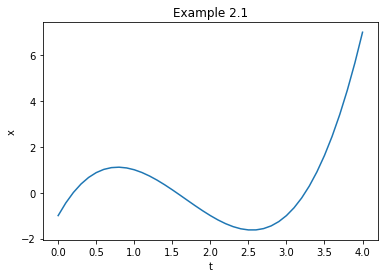

In [23]:
plt.plot(tplot, xplot)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Example 2.1')
plt.show()

In [29]:
def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

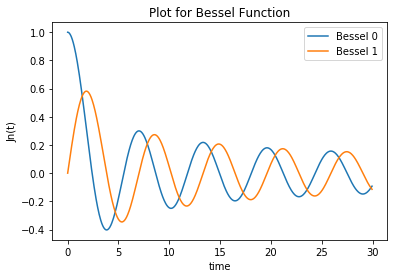

In [30]:
from scipy.special import jn

def Bessel0(s):
    return jn(0, s)

def Bessel1(s):
    return jn(1, s)

t    = 0.0
dt   = 0.05
tmax = 30.0

tplot  = [t]
J0plot = [Bessel0(0)]
J1plot = [Bessel1(0)]

while t < tmax:
    tplot.append(t)
    J0plot.append(Bessel0(t))
    J1plot.append(Bessel1(t))
    t+= dt

plt.plot(tplot, J0plot,label="Bessel 0")
plt.plot(tplot, J1plot, label="Bessel 1")
plt.xlabel('time')
plt.ylabel('Jn(t)')
plt.title('Plot for Bessel Function')
plt.legend()
plt.show()
          


first linear interpolation maximum = 0.30007927052 at t = 6.999999999999991
first quadraditic interpolation maximum = 0.300116758813 at t = 7.01579543371
first linear interpolation minimum = -0.402556410179 at t = 3.800000000000002
first quadratic interpolation minimum = -0.402764041999 at t = 3.83199489935


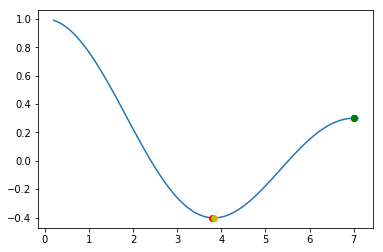

In [37]:
def f(s):
    return jn(0, s)

def quad_fit(tpp, xpp, tp, xp, t, x):
    dt = t - tp
    a  = xp
    b  = (x-xpp)/(2*dt)
    c  = (x-2*xp+xpp)/(2*dt**2)
    tmax = tp -b/(2*c)
    xmax = a - b**2/(4*c)
    return tmax, xmax, a, b, c

# Step in time
dt    = 0.1
# Maximum value of time, but program may end before reaching this value
tlast = 10.0

# Initialize tp and t. tpp will be initialized inside the main loop.
tp    = 0.0
t     = dt

# Initialize xp and x.
xp    = f(tp)
x     = f(t)

# Count how many maxima and minima have found.
countmax = 0
countmin = 0

tplot = []
xplot = []

while t < tlast:
    
    tpp = tp
    tp  = t
    t  += dt
    
    xpp = xp
    xp  = x
    x   = f(t)

    tplot.append(t)
    xplot.append(x)

    # Check for a maximum.
    # WRITE AN if THAT TESTS WHETHER
    # xp IS MAXIMUM:
    #  - BIGGER THAN x
    # AND
    #  - BIGGER THAN xpp
    if (xp > xpp) and (xp > x):
        if countmax == 0:
            tmax = tp
            xmax = xp
            tmax_int, xmax_int, a, b, c = quad_fit(tpp, xpp, tp, xp, t, x)
            countmax = 1

    # Check for a minimum.
    # WRITE AN if THAT TESTS WHETHER
    # xp IS MINIMUM:
    #  - SMALLER THAN x
    # AND
    #  - SMALLER THAN xpp
    if (xp < xpp) and (xp < x):
        if countmin == 0:
            tmin = tp
            xmin = xp
            tmin_int, xmin_int, a, b, c = quad_fit(tpp, xpp, tp, xp, t, x)
            countmin = 1

    if countmax > 0 and countmin > 0: break

        
print ('first linear interpolation maximum =', xmax, 'at t =', tmax)
print ('first quadraditic interpolation maximum =', xmax_int, 'at t =', tmax_int)

print ('first linear interpolation minimum =', xmin, 'at t =', tmin)
print ('first quadratic interpolation minimum =', xmin_int, 'at t =', tmin_int)


plt.plot(tplot, xplot)
plt.plot(tmax, xmax, 'ko')
plt.plot(tmax_int,xmax_int, 'go')
plt.plot(tmin, xmin, 'ro')
plt.plot(tmin_int, xmin_int, 'yo')
         
plt.show()